In [3]:
import pandas as pd
import nltk
import re
import string
import numpy as np
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import os
import threading
from nltk.stem import SnowballStemmer
from collections import defaultdict
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from timeit import default_timer as timer
import timeit
import time

basic_stopwords = stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

basic_stopwords = stopwords.words('english')

df = pd.read_csv("dataset2.csv",encoding='latin')
df = df.drop(df.columns[[1,2,3,4]],axis=1)
df = df.rename(columns={df.columns[0]: 'target', df.columns[1]: 'tweet'})

vocabulary = []

punctuation = string.punctuation

def clean(data):
    remove_punctuation = str.maketrans('', '', punctuation)
    cleaned = defaultdict(list)
    count = 0
    for tweet in data:
        tweet = tweet.lower()
        tweet = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',tweet)
        tweet = re.sub(r"@\S+", "", tweet) 
        for word in tweet.split():
            if word not in basic_stopwords and word.isalnum() and not word.isdigit():
                word = word.translate(remove_punctuation)
#                 words = ps.stem(words) #creating stems
                cleaned[count].append(word.lower())#to lowercase
        cleaned[count] = ' '.join(cleaned[count])
        count +=1
    return(list(cleaned.values()))

start = timer()
X = clean(df['tweet'])
Y = df['target']
end = timer()
print(end - start)



[nltk_data] Downloading package wordnet to /home/antonis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/antonis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/antonis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


26.79755911500024


In [11]:
df['target'] = df['target'].replace(4,1)

In [12]:
df['target'].unique()

array([0, 1])

In [4]:

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.05, random_state =261051134)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
x_train = vectoriser.transform(x_train)
x_test = vectoriser.transform(x_test)

No. of feature_words:  500000


In [8]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def model_Evaluate(model):
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


              precision    recall  f1-score   support

           0       0.78      0.75      0.76     39898
           4       0.76      0.79      0.78     40102

    accuracy                           0.77     80000
   macro avg       0.77      0.77      0.77     80000
weighted avg       0.77      0.77      0.77     80000



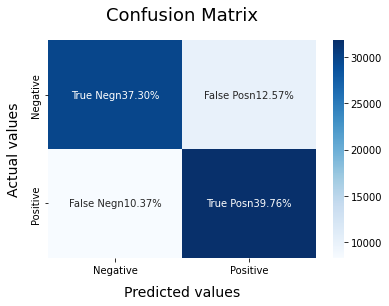

In [13]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(x_test)

              precision    recall  f1-score   support

           0       0.79      0.71      0.74     39898
           4       0.73      0.81      0.77     40102

    accuracy                           0.76     80000
   macro avg       0.76      0.76      0.76     80000
weighted avg       0.76      0.76      0.76     80000



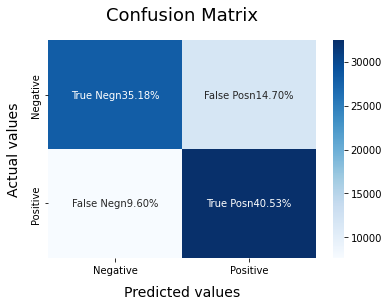

In [114]:
from sklearn.naive_bayes import BernoulliNB

BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(x_test)

              precision    recall  f1-score   support

           0       0.76      0.73      0.75     39898
           4       0.74      0.78      0.76     40102

    accuracy                           0.75     80000
   macro avg       0.75      0.75      0.75     80000
weighted avg       0.75      0.75      0.75     80000



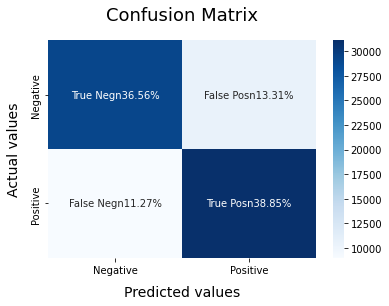

In [115]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
